In [41]:
!pip install shioaji
import numpy as np
import pandas as pd
import requests
import shioaji as sj
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
from google.colab import userdata


# 建立API物件，simulation=True是代表測試帳號
api = sj.Shioaji(simulation=True)

#==== for Colab
shioaji_secret=userdata.get('SHIOAJI_SECRETKEY')
shioaji_apikey=userdata.get('SHIOAJI_APIKEY')


# 登入你的key
# accounts = api.login("YOUR_API_KEY", "YOUR_SECRET_KEY")
accounts = api.login(shioaji_apikey, shioaji_secret)



#要下單的話要匯入憑證
# api.activate_ca(
#     ca_path="/c/your/ca/path/Sinopac.pfx",
#     ca_passwd="YOUR_CA_PASSWORD",
#     person_id="Person of this Ca",
# )

Response Code: 0 | Event Code: 0 | Info: host '210.59.255.161:80', IP 210.59.255.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total connection attempt 1 of 1) | Event: Session up


In [20]:
print(api.usage())

today = datetime.today().date()

scanners = api.scanners(
    scanner_type=sj.constant.ScannerType.AmountRank,
    count=100,
    date=str(today)
)
df = pd.DataFrame(s.__dict__ for s in scanners)
df.ts = pd.to_datetime(df.ts)
df

connections=2 bytes=322361746 limit_bytes=524288000 remaining_bytes=201926254


,date,code,name,ts,open,high,low,close,price_range,tick_type,...,volume_ratio,buy_price,buy_volume,sell_price,sell_volume,bid_orders,bid_volumes,ask_orders,ask_volumes,rank_value
0,2024-08-02,2330,台積電,2024-08-02 13:30:00,918.0,928.0,903.0,903.0,25.0,2,...,1.59,903.0,299,904.0,90,12008,584443,11335,1059526,6.899095e+10
1,2024-08-02,2317,鴻海,2024-08-02 13:30:00,192.5,194.5,185.5,186.5,9.0,2,...,2.43,186.5,1490,187.0,171,17650,214423,12517,1102913,3.241045e+10
2,2024-08-02,2454,聯發科,2024-08-02 13:30:00,1130.0,1140.0,1090.0,1090.0,50.0,2,...,1.14,1090.0,92,1095.0,80,1286,33865,3367,114659,1.524325e+10
3,2024-08-02,2382,廣達,2024-08-02 13:30:00,274.5,277.0,265.5,266.0,11.5,2,...,1.02,266.0,269,266.5,38,6101,145200,5670,207357,1.106962e+10
4,2024-08-02,3037,欣興,2024-08-02 13:30:00,173.5,176.5,165.5,166.0,11.0,1,...,1.50,166.0,75,166.5,112,5995,128802,7092,161140,9.317648e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-08-02,2486,一詮,2024-08-02 13:30:00,106.0,110.5,105.5,106.5,5.0,2,...,0.40,106.5,166,107.0,115,1162,25675,1695,40587,1.198150e+09
96,2024-08-02,8064,東捷,2024-08-02 13:30:00,61.1,62.6,59.0,59.4,3.6,1,...,0.44,59.4,72,59.5,7,2621,121859,3658,306874,1.184817e+09
97,2024-08-02,6789,采鈺,2024-08-02 13:30:00,322.5,323.5,304.0,304.0,19.5,1,...,2.02,0.0,0,304.0,483,675,4089,1000,5246,1.183272e+09
98,2024-08-02,2520,冠德,2024-08-02 13:30:00,60.7,61.9,56.2,56.2,5.7,2,...,1.31,56.2,70,56.3,14,1616,14660,2888,43612,1.180685e+09


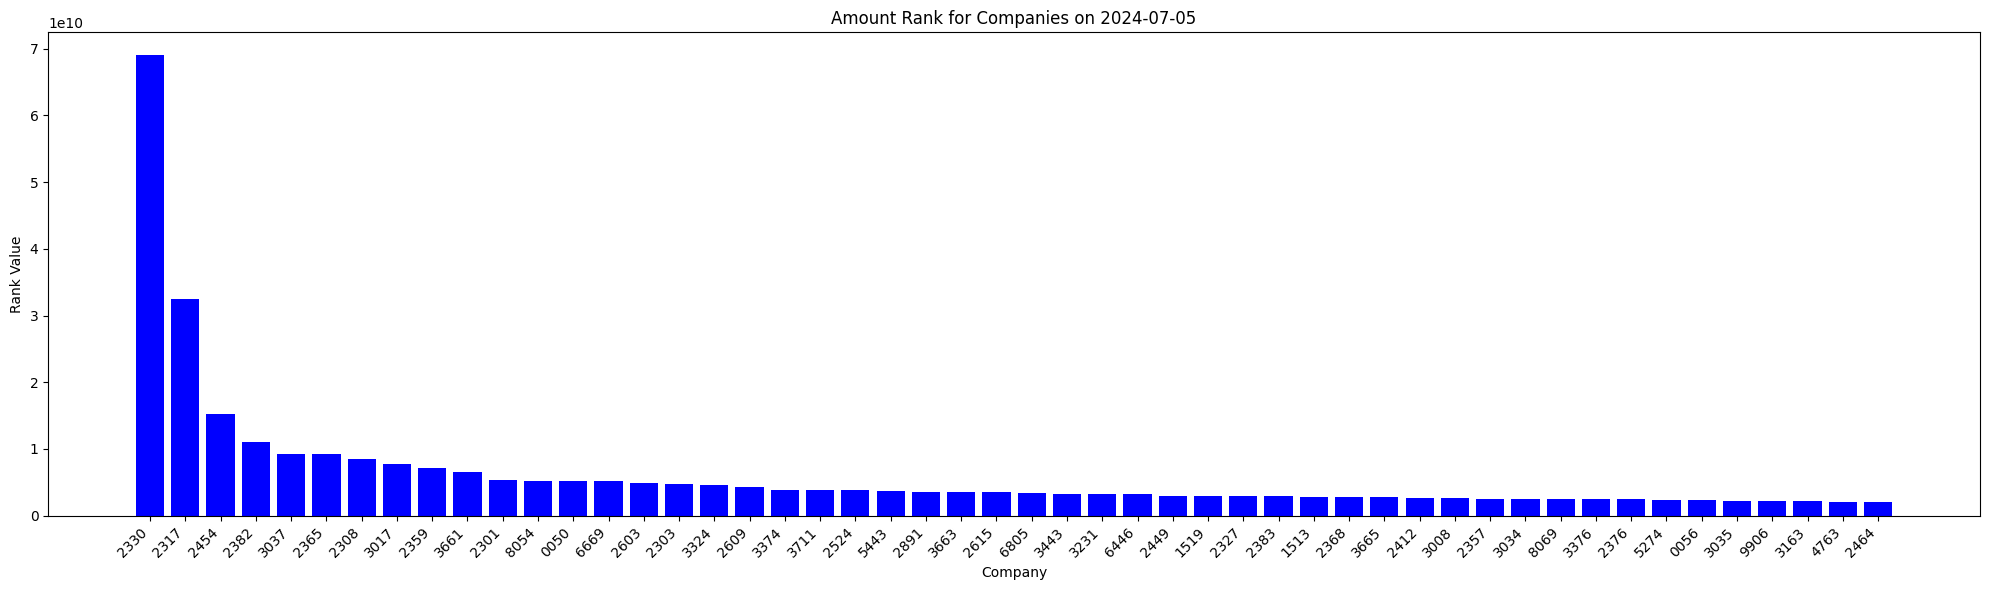

In [12]:
# 設置圖表大小
plt.figure(figsize=(20, 6))

# 提取 DataFrame 中的數據
names = df['code']
rank_values = df['rank_value']

# 繪製長條圖
plt.bar(names, rank_values, color='blue')

# 添加標籤和標題
plt.xlabel('Company')
plt.ylabel('Rank Value')
plt.title('Amount Rank for Companies on {}'.format(date_str))

# 自動調整 X 軸標籤
plt.xticks(rotation=45, ha='right')

# 顯示圖表
plt.tight_layout()
plt.show()


In [ ]:
plt.close()
# 設置日期範圍
start_date = datetime.date(2024, 1, 1)
end_date = datetime.date(2024, 3, 22)
# 生成日期範圍
dates = [start_date + datetime.timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# 創建動畫函數
def animate(date):
    date_str = date.strftime('%Y-%m-%d')
    scanners = api.scanners(
        scanner_type=sj.constant.ScannerType.AmountRank,
        count=20,
        date=date_str
    )
    df = pd.DataFrame(s.__dict__ for s in scanners)
    df.ts = pd.to_datetime(df.ts)

    plt.figure(figsize=(10, 6))
    plt.bar(df['code'], df['rank_value'], color='blue')
    plt.xlabel('company')
    plt.ylabel('amout value')
    plt.title('Amount Rank ({})'.format(date_str))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()



# 關閉之前的圖表
plt.close()
# 創建動畫
ani = animation.FuncAnimation(plt.figure(), animate, frames=dates, interval=100)

# 顯示動畫

plt.show()

<Figure size 640x480 with 0 Axes>

change_type (int): 漲跌 {LimitUp, Up, Unchanged, Down, LimitDown}


*   LimitUp:1
*   Up:2
*   Unchanged:3
*   Down:4
*   LimitDown:5





In [31]:
## 漲家數&跌幅家數
df[['name','price_range','change_price','change_type']]

changeTypeDf=df.change_type.value_counts()
print(changeTypeDf)
changeTypeDf[4]



change_type
4    82
2     7
5     7
1     3
3     1
Name: count, dtype: int64


82

In [43]:
def getAmountRank():
  today = datetime.today().date()

  scanners = api.scanners(
      scanner_type=sj.constant.ScannerType.AmountRank,
      count=10,
      date=str(today)
  )
  df = pd.DataFrame(s.__dict__ for s in scanners)
  df.ts = pd.to_datetime(df.ts)
  return df

print(getAmountRank())


         date  code   name                  ts    open    high     low  \
0  2024-08-02  2330    台積電 2024-08-02 14:30:00   918.0   928.0   903.0   
1  2024-08-02  2317     鴻海 2024-08-02 14:30:00   192.5   194.5   185.5   
2  2024-08-02  2454    聯發科 2024-08-02 14:30:00  1130.0  1140.0  1090.0   
3  2024-08-02  2382     廣達 2024-08-02 14:30:00   274.5   277.0   265.5   
4  2024-08-02  3037     欣興 2024-08-02 14:30:00   173.5   176.5   165.5   
5  2024-08-02  2365     昆盈 2024-08-02 14:30:00    62.0    66.6    59.9   
6  2024-08-02  2308    台達電 2024-08-02 14:30:00   392.5   405.0   389.0   
7  2024-08-02  3017     奇鋐 2024-08-02 14:30:00   608.0   640.0   592.0   
8  2024-08-02  2359    所羅門 2024-08-02 14:30:00   148.0   163.5   146.0   
9  2024-08-02  3661  世芯-KY 2024-08-02 14:30:00  2475.0  2495.0  2335.0   

    close  price_range  tick_type  ...  volume_ratio  buy_price  buy_volume  \
0   903.0         25.0          2  ...          1.61      903.0         299   
1   186.5          9.0     

In [44]:
print(api.usage())

connections=4 bytes=529931510 limit_bytes=524288000 remaining_bytes=-5643510
